# **8-1-1**

In [1]:
# 1. Import thư viện cần thiết
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
import seaborn as sns
%matplotlib inline

# holt winters
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose

Mounted at /content/drive


In [2]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('/content/drive/MyDrive/StockData/TSLA.csv')
df.set_index('Date', inplace=True)
df1 = df[['Close']]
df1

,Close
Date,
1/3/2012,1.87
1/4/2012,1.85
1/5/2012,1.81
1/6/2012,1.79
1/9/2012,1.82
...,...
11/30/2023,240.08
12/1/2023,238.83
12/4/2023,235.58


In [3]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.0008569 ],
       [0.00080793],
       [0.00071   ],
       ...,
       [0.57304444],
       [0.58073204],
       [0.58232342]])

In [4]:
# 4. Chia train, test, validation
train_size = int(0.8 * len(df1))
test_size = int(0.1 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]


In [5]:
# Tạo mô hình Holt Winter
model = ExponentialSmoothing(train_data, seasonal='add', seasonal_periods=7)
# Fit mô hình với dữ liệu train
fitted_model = model.fit()
# Dự đoán với dữ liệu test
test_predictions = fitted_model.forecast(test_size)
# Dự đoán với dữ liệu validation
val_predictions = fitted_model.forecast(val_size)


In [6]:
# Forecast the next 30 days
forecast_next_30_days = fitted_model.forecast(steps=30)
forecast_next_30_days = scaler.inverse_transform(forecast_next_30_days.reshape(-1, 1))

forecast_next_30_days

array([[215.44153729],
       [215.96135754],
       [214.99579256],
       [215.27459069],
       [215.23480459],
       [214.98092165],
       [215.40141446],
       [215.44153729],
       [215.96135754],
       [214.99579256],
       [215.27459069],
       [215.23480459],
       [214.98092165],
       [215.40141446],
       [215.44153729],
       [215.96135754],
       [214.99579256],
       [215.27459069],
       [215.23480459],
       [214.98092165],
       [215.40141446],
       [215.44153729],
       [215.96135754],
       [214.99579256],
       [215.27459069],
       [215.23480459],
       [214.98092165],
       [215.40141446],
       [215.44153729],
       [215.96135754]])

In [7]:
# Đánh giá độ chính xác validate, test

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

test_mae = mean_absolute_error(test_predictions, test_data)
test_rmse = np.sqrt(mean_squared_error(test_predictions, test_data))
test_mape = mean_absolute_percentage_error(test_predictions, test_data)
print('Testing MAE:', test_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('---------------------------')
val_mae = mean_absolute_error(val_predictions, val_data)
val_rmse = np.sqrt(mean_absolute_error(val_predictions, val_data))
val_mape = mean_absolute_percentage_error(val_predictions, val_data)
print('Validation MAE:', val_mae)
print('Validation RMSE:', val_rmse)
print('Validation MAPE:', val_mape)

Testing MAE: 0.18208697000134808
Testing RMSE: 0.21672112487594325
Testing MAPE: 0.34785285814550726
---------------------------
Validation MAE: 0.08730270865349754
Validation RMSE: 0.2954703177198981
Validation MAPE: 0.1667790186270206


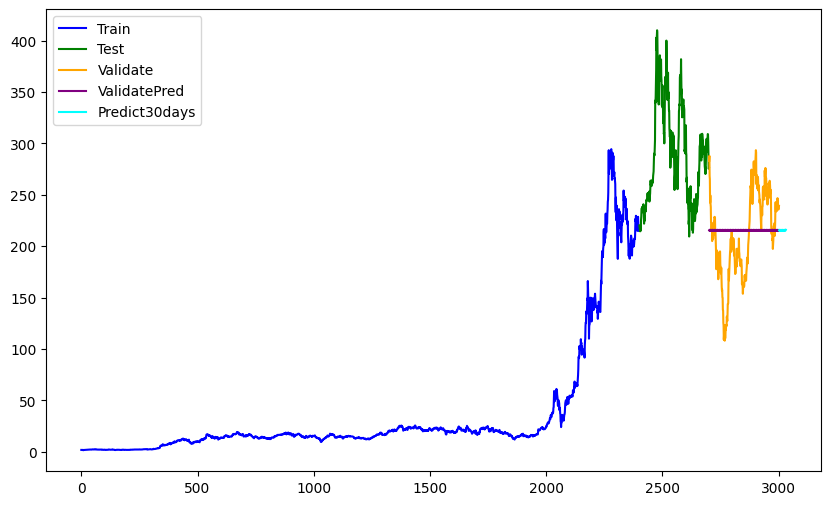

In [8]:
# Tạo các chỉ số cho dữ liệu train, test, validation, và dự đoán 30 ngày tiếp theo
train_index = np.arange(0, train_size)
test_index = np.arange(train_size, train_size + test_size)
val_index = np.arange(train_size + test_size, len(df1))
next_30_days_index = np.arange(len(df1), len(df1) + 30)

# Đảo ngược lại quá trình scaling cho dữ liệu train, test, validation, và dự đoán 30 ngày tiếp theo
train_data_original = scaler.inverse_transform(train_data.reshape(-1, 1)).flatten()
test_data_original = scaler.inverse_transform(test_data.reshape(-1, 1)).flatten()
val_data_original = scaler.inverse_transform(val_data.reshape(-1, 1)).flatten()
forecast_next_30_days_original = forecast_next_30_days.flatten()

# Vẽ đồ thị
plt.figure(figsize=(10, 6))

# Dữ liệu train
plt.plot(train_index, train_data_original, label='Train', color='blue')

# Dữ liệu test
plt.plot(test_index, test_data_original, label='Test', color='green')

# Dữ liệu validation
plt.plot(val_index, val_data_original, label='Validate', color='orange')

# Dự đoán cho dữ liệu validation
val_predictions = scaler.inverse_transform(val_predictions.reshape(-1, 1))
plt.plot(val_index, val_predictions, label='ValidatePred', color='purple')

# Dự đoán cho 30 ngày tiếp theo
plt.plot(next_30_days_index, forecast_next_30_days_original, label='Predict30days', color='cyan')

plt.legend()

plt.show()


# **7-2-1**


In [9]:
# 1. Import thư viện cần thiết
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
import seaborn as sns
%matplotlib inline

# holt winters
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('/content/drive/MyDrive/StockData/TSLA.csv')
df.set_index('Date', inplace=True)
df1 = df[['Close']]
df1

,Close
Date,
1/3/2012,1.87
1/4/2012,1.85
1/5/2012,1.81
1/6/2012,1.79
1/9/2012,1.82
...,...
11/30/2023,240.08
12/1/2023,238.83
12/4/2023,235.58


In [11]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.0008569 ],
       [0.00080793],
       [0.00071   ],
       ...,
       [0.57304444],
       [0.58073204],
       [0.58232342]])

In [12]:
# 4. Chia train, test, validation
train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]


In [13]:
# Tạo mô hình Holt Winter
model = ExponentialSmoothing(train_data, seasonal='add', seasonal_periods=7)
# Fit mô hình với dữ liệu train
fitted_model = model.fit()
# Dự đoán với dữ liệu test
test_predictions = fitted_model.forecast(test_size)
# Dự đoán với dữ liệu validation
val_predictions = fitted_model.forecast(val_size)


In [14]:
# Forecast the next 30 days
forecast_next_30_days = fitted_model.forecast(steps=30)
forecast_next_30_days = scaler.inverse_transform(forecast_next_30_days.reshape(-1, 1))

forecast_next_30_days

array([[54.60778858],
       [54.56531558],
       [54.62755466],
       [54.58226617],
       [54.54486001],
       [54.52859023],
       [54.61732766],
       [54.60778858],
       [54.56531558],
       [54.62755466],
       [54.58226617],
       [54.54486001],
       [54.52859023],
       [54.61732766],
       [54.60778858],
       [54.56531558],
       [54.62755466],
       [54.58226617],
       [54.54486001],
       [54.52859023],
       [54.61732766],
       [54.60778858],
       [54.56531558],
       [54.62755466],
       [54.58226617],
       [54.54486001],
       [54.52859023],
       [54.61732766],
       [54.60778858],
       [54.56531558]])

In [15]:
# Đánh giá độ chính xác validate, test

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

test_mae = mean_absolute_error(test_predictions, test_data)
test_rmse = np.sqrt(mean_squared_error(test_predictions, test_data))
test_mape = mean_absolute_percentage_error(test_predictions, test_data)
print('Testing MAE:', test_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('---------------------------')
val_mae = mean_absolute_error(val_predictions, val_data)
val_rmse = np.sqrt(mean_absolute_error(val_predictions, val_data))
val_mape = mean_absolute_percentage_error(val_predictions, val_data)
print('Validation MAE:', val_mae)
print('Validation RMSE:', val_rmse)
print('Validation MAPE:', val_mape)

Testing MAE: 0.4343196341561866
Testing RMSE: 0.4785031397639096
Testing MAPE: 3.3432188707851664
---------------------------
Validation MAE: 0.3821445613900737
Validation RMSE: 0.6181784219706101
Validation MAPE: 2.941594290112122


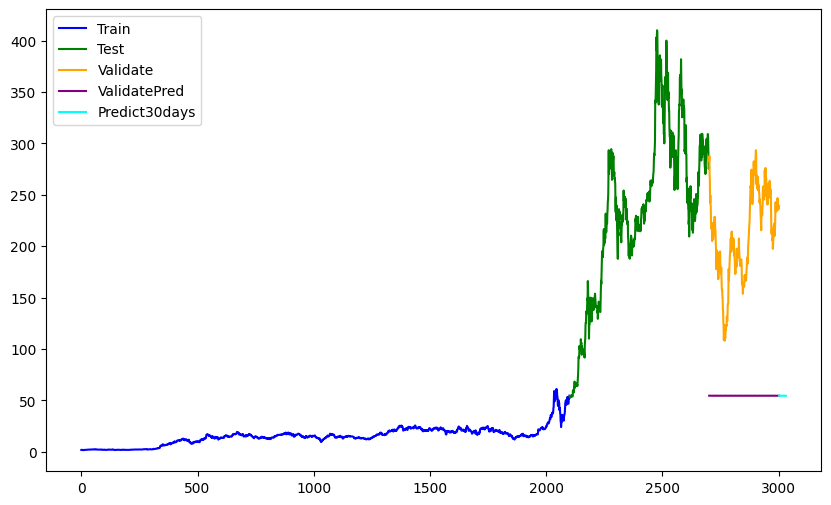

In [16]:
# Tạo các chỉ số cho dữ liệu train, test, validation, và dự đoán 30 ngày tiếp theo
train_index = np.arange(0, train_size)
test_index = np.arange(train_size, train_size + test_size)
val_index = np.arange(train_size + test_size, len(df1))
next_30_days_index = np.arange(len(df1), len(df1) + 30)

# Đảo ngược lại quá trình scaling cho dữ liệu train, test, validation, và dự đoán 30 ngày tiếp theo
train_data_original = scaler.inverse_transform(train_data.reshape(-1, 1)).flatten()
test_data_original = scaler.inverse_transform(test_data.reshape(-1, 1)).flatten()
val_data_original = scaler.inverse_transform(val_data.reshape(-1, 1)).flatten()
forecast_next_30_days_original = forecast_next_30_days.flatten()

# Vẽ đồ thị
plt.figure(figsize=(10, 6))

# Dữ liệu train
plt.plot(train_index, train_data_original, label='Train', color='blue')

# Dữ liệu test
plt.plot(test_index, test_data_original, label='Test', color='green')

# Dữ liệu validation
plt.plot(val_index, val_data_original, label='Validate', color='orange')

# Dự đoán cho dữ liệu validation
val_predictions = scaler.inverse_transform(val_predictions.reshape(-1, 1))
plt.plot(val_index, val_predictions, label='ValidatePred', color='purple')

# Dự đoán cho 30 ngày tiếp theo
plt.plot(next_30_days_index, forecast_next_30_days_original, label='Predict30days', color='cyan')

plt.legend()

plt.show()


# **6-2-2**

In [17]:
# 1. Import thư viện cần thiết
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
import seaborn as sns
%matplotlib inline

# holt winters
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('/content/drive/MyDrive/StockData/TSLA.csv')
df.set_index('Date', inplace=True)
df1 = df[['Close']]
df1

,Close
Date,
1/3/2012,1.87
1/4/2012,1.85
1/5/2012,1.81
1/6/2012,1.79
1/9/2012,1.82
...,...
11/30/2023,240.08
12/1/2023,238.83
12/4/2023,235.58


In [19]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.0008569 ],
       [0.00080793],
       [0.00071   ],
       ...,
       [0.57304444],
       [0.58073204],
       [0.58232342]])

In [20]:
# 4. Chia train, test, validation
train_size = int(0.6 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]


In [21]:
# Tạo mô hình Holt Winter
model = ExponentialSmoothing(train_data, seasonal='add', seasonal_periods=7)
# Fit mô hình với dữ liệu train
fitted_model = model.fit()
# Dự đoán với dữ liệu test
test_predictions = fitted_model.forecast(test_size)
# Dự đoán với dữ liệu validation
val_predictions = fitted_model.forecast(val_size)


In [22]:
# Forecast the next 30 days
forecast_next_30_days = fitted_model.forecast(steps=30)
forecast_next_30_days = scaler.inverse_transform(forecast_next_30_days.reshape(-1, 1))

forecast_next_30_days

array([[19.67686528],
       [19.67037036],
       [19.67854985],
       [19.6748546 ],
       [19.68034271],
       [19.70375082],
       [19.69757358],
       [19.67686528],
       [19.67037036],
       [19.67854985],
       [19.6748546 ],
       [19.68034271],
       [19.70375082],
       [19.69757358],
       [19.67686528],
       [19.67037036],
       [19.67854985],
       [19.6748546 ],
       [19.68034271],
       [19.70375082],
       [19.69757358],
       [19.67686528],
       [19.67037036],
       [19.67854985],
       [19.6748546 ],
       [19.68034271],
       [19.70375082],
       [19.69757358],
       [19.67686528],
       [19.67037036]])

In [23]:
# Đánh giá độ chính xác validate, test

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

test_mae = mean_absolute_error(test_predictions, test_data)
test_rmse = np.sqrt(mean_squared_error(test_predictions, test_data))
test_mape = mean_absolute_percentage_error(test_predictions, test_data)
print('Testing MAE:', test_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('---------------------------')
val_mae = mean_absolute_error(val_predictions, val_data)
val_rmse = np.sqrt(mean_absolute_error(val_predictions, val_data))
val_mape = mean_absolute_percentage_error(val_predictions, val_data)
print('Validation MAE:', val_mae)
print('Validation RMSE:', val_rmse)
print('Validation MAPE:', val_mape)

Testing MAE: 0.2007873693509414
Testing RMSE: 0.2927650054745769
Testing MAPE: 4.5152772439575495
---------------------------
Validation MAE: 0.5640977819160441
Validation RMSE: 0.7510644325995235
Validation MAPE: 12.685336226874961


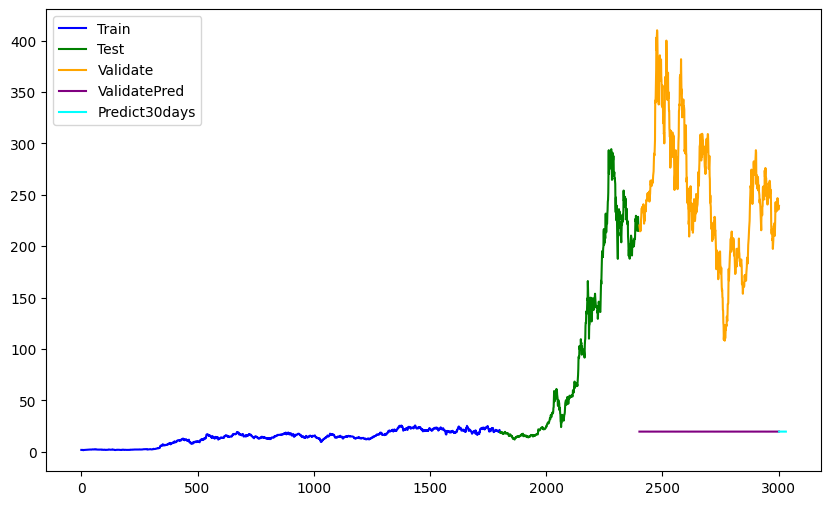

In [24]:
# Tạo các chỉ số cho dữ liệu train, test, validation, và dự đoán 30 ngày tiếp theo
train_index = np.arange(0, train_size)
test_index = np.arange(train_size, train_size + test_size)
val_index = np.arange(train_size + test_size, len(df1))
next_30_days_index = np.arange(len(df1), len(df1) + 30)

# Đảo ngược lại quá trình scaling cho dữ liệu train, test, validation, và dự đoán 30 ngày tiếp theo
train_data_original = scaler.inverse_transform(train_data.reshape(-1, 1)).flatten()
test_data_original = scaler.inverse_transform(test_data.reshape(-1, 1)).flatten()
val_data_original = scaler.inverse_transform(val_data.reshape(-1, 1)).flatten()
forecast_next_30_days_original = forecast_next_30_days.flatten()

# Vẽ đồ thị
plt.figure(figsize=(10, 6))

# Dữ liệu train
plt.plot(train_index, train_data_original, label='Train', color='blue')

# Dữ liệu test
plt.plot(test_index, test_data_original, label='Test', color='green')

# Dữ liệu validation
plt.plot(val_index, val_data_original, label='Validate', color='orange')

# Dự đoán cho dữ liệu validation
val_predictions = scaler.inverse_transform(val_predictions.reshape(-1, 1))
plt.plot(val_index, val_predictions, label='ValidatePred', color='purple')

# Dự đoán cho 30 ngày tiếp theo
plt.plot(next_30_days_index, forecast_next_30_days_original, label='Predict30days', color='cyan')

plt.legend()

plt.show()
